# **DEEP LEARNING**

**UNIVERSIDAD MILITAR NUEVA GRANADA**

**DEEP LEARNING - INTRODUCCION AL MANEJO DE DATOS (PANDAS)**

Diego Renza Torres

Ingeniería en Telecomunicaciones

# 1. Lectura de Dataset

In [2]:
#Crear la carpeta si no existe
import os

def mkdir_if_not_exist(path):
    """Make a directory if it does not exist."""
    if not isinstance(path, str):
        path = os.path.join(*path)
    if not os.path.exists(path):
        os.makedirs(path)

In [11]:
#Escribir una dataset de prueba
data_file = '../datos/datos_empleados.csv'
mkdir_if_not_exist('../datos')
with open(data_file, 'w') as f:
    f.write('ID,Nombres,Apellidos\n')  # Column names
    f.write('123456,Pepito,Perez\n')  # Each row represents a data example
    f.write('456789,Fulano,De tal\n')
    f.write('789012,Perico,De los palotes\n')
    f.write('012345,Don,Nadie\n')
    f.write('102030,Zutanito,\n')
    f.write('405060,Perencejo,\n')

# 2. Importar Pandas

In [12]:
#!pip install pandas # Solo para instalar pandas
import pandas as pd

data_file = '../datos/datos_empleados.csv'

data = pd.read_csv(data_file)
print(data)

       ID    Nombres       Apellidos
0  123456     Pepito           Perez
1  456789     Fulano          De tal
2  789012     Perico  De los palotes
3   12345        Don           Nadie
4  102030   Zutanito             NaN
5  405060  Perencejo             NaN


# 3. Manejo de datos faltantes
Valores "NaN":
Imputation: sustituye el valor NaN por un valor pre-definido

Deletion, ignora valores NaN

Integer-location based indexing (iloc): para separar los datos en entrada y salida

In [13]:
# Integer-location based indexing (iloc): para separar los datos en entrada y salida
# Reemplazar NAn con el valor medio
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)
print(outputs)

       ID    Nombres
0  123456     Pepito
1  456789     Fulano
2  789012     Perico
3   12345        Don
4  102030   Zutanito
5  405060  Perencejo
0             Perez
1            De tal
2    De los palotes
3             Nadie
4               NaN
5               NaN
Name: Apellidos, dtype: object


<ipython-input-13-432d55dff3c6>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  inputs = inputs.fillna(inputs.mean())


**Separar Valores NaN**

In [16]:
#Los valores NaN quedarán como columnas aparte, separadas tipo multiclass
outputs = pd.get_dummies(outputs, dummy_na=True)
print(outputs)

   De los palotes  De tal  Nadie  Perez  NaN
0               0       0      0      1    0
1               0       1      0      0    0
2               1       0      0      0    0
3               0       0      1      0    0
4               0       0      0      0    1
5               0       0      0      0    1


# 4. Operaciones sobre los datos

**Estadísticas del contenido (por columna) del archivo csv**

In [17]:
data.describe()

,ID
count,6.000000
mean,314782.000000
std,292077.862558
min,12345.000000
25%,107386.500000
50%,264258.000000
75%,443856.750000
max,789012.000000


**Visualizar las 5 primeras filas del archivo csv**

In [18]:
data.head()

,ID,Nombres,Apellidos
0,123456,Pepito,Perez
1,456789,Fulano,De tal
2,789012,Perico,De los palotes
3,12345,Don,Nadie
4,102030,Zutanito,NaN


**Dibujar el histograma de cualquiera de las columnas (entrada o salida) del archivo csv**

array([[<Axes: title={'center': 'ID'}>]], dtype=object)

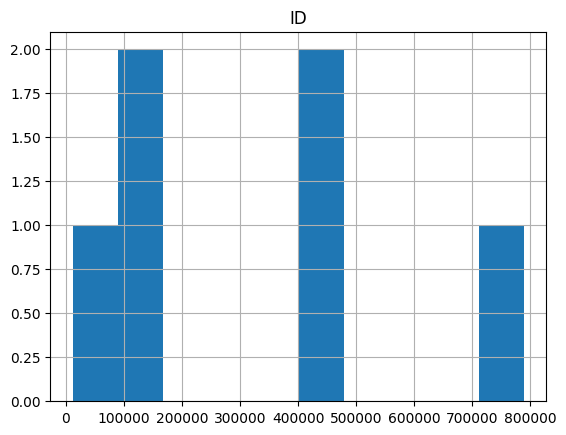

In [19]:
inputs.hist('ID')

**Crear una nueva columna de entrada a partir de dos columnas existentes**

In [20]:
inputs['ID_normalizado']= inputs['ID']/999999
inputs.head()

,ID,Nombres_Don,Nombres_Fulano,Nombres_Pepito,Nombres_Perencejo,Nombres_Perico,Nombres_Zutanito,Nombres_nan,ID_normalizado
0,123456,0,0,1,0,0,0,0,0.123456
1,456789,0,1,0,0,0,0,0,0.456789
2,789012,0,0,0,0,1,0,0,0.789013
3,12345,1,0,0,0,0,0,0,0.012345
4,102030,0,0,0,0,0,1,0,0.102030


**Aleatorizar los datos en términos de sus filas**

In [21]:
import numpy as np
inputs.reindex(np.random.permutation(inputs.index))

,ID,Nombres_Don,Nombres_Fulano,Nombres_Pepito,Nombres_Perencejo,Nombres_Perico,Nombres_Zutanito,Nombres_nan,ID_normalizado
4,102030,0,0,0,0,0,1,0,0.102030
1,456789,0,1,0,0,0,0,0,0.456789
2,789012,0,0,0,0,1,0,0,0.789013
5,405060,0,0,0,1,0,0,0,0.405060
0,123456,0,0,1,0,0,0,0,0.123456
3,12345,1,0,0,0,0,0,0,0.012345


# 4. Convertir a Tensor

In [ ]:
import tensorflow as tf

X, y = tf.constant(inputs.values), tf.constant(outputs.values)
tf.constant(outputs.values)

X, y

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([127500, 106000, 178100, 140000])>

# Referencias

Dive into Deep Learning